In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data analysis

In [2]:
df = pd.read_csv("glass.csv", header=None, names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'TypeOfGlass']).iloc[:, 1:]

In [3]:
display(df)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df_features = df.iloc[:, :-1]

In [5]:
df_features.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


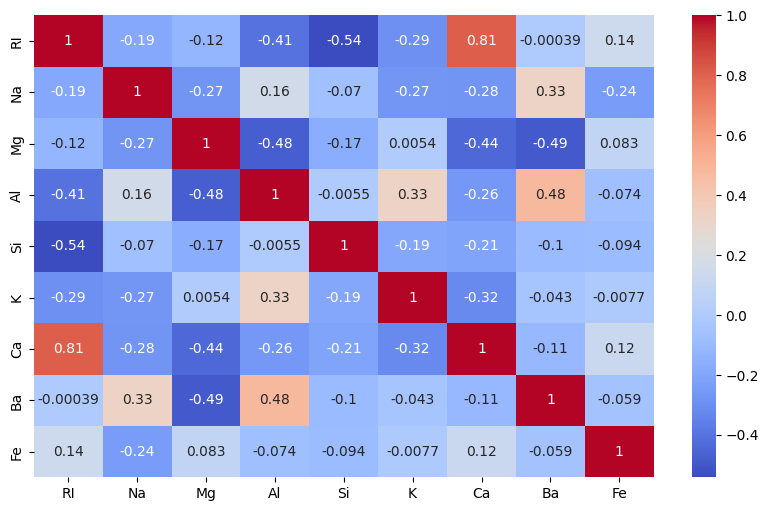

In [9]:
corr_matrix = df_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

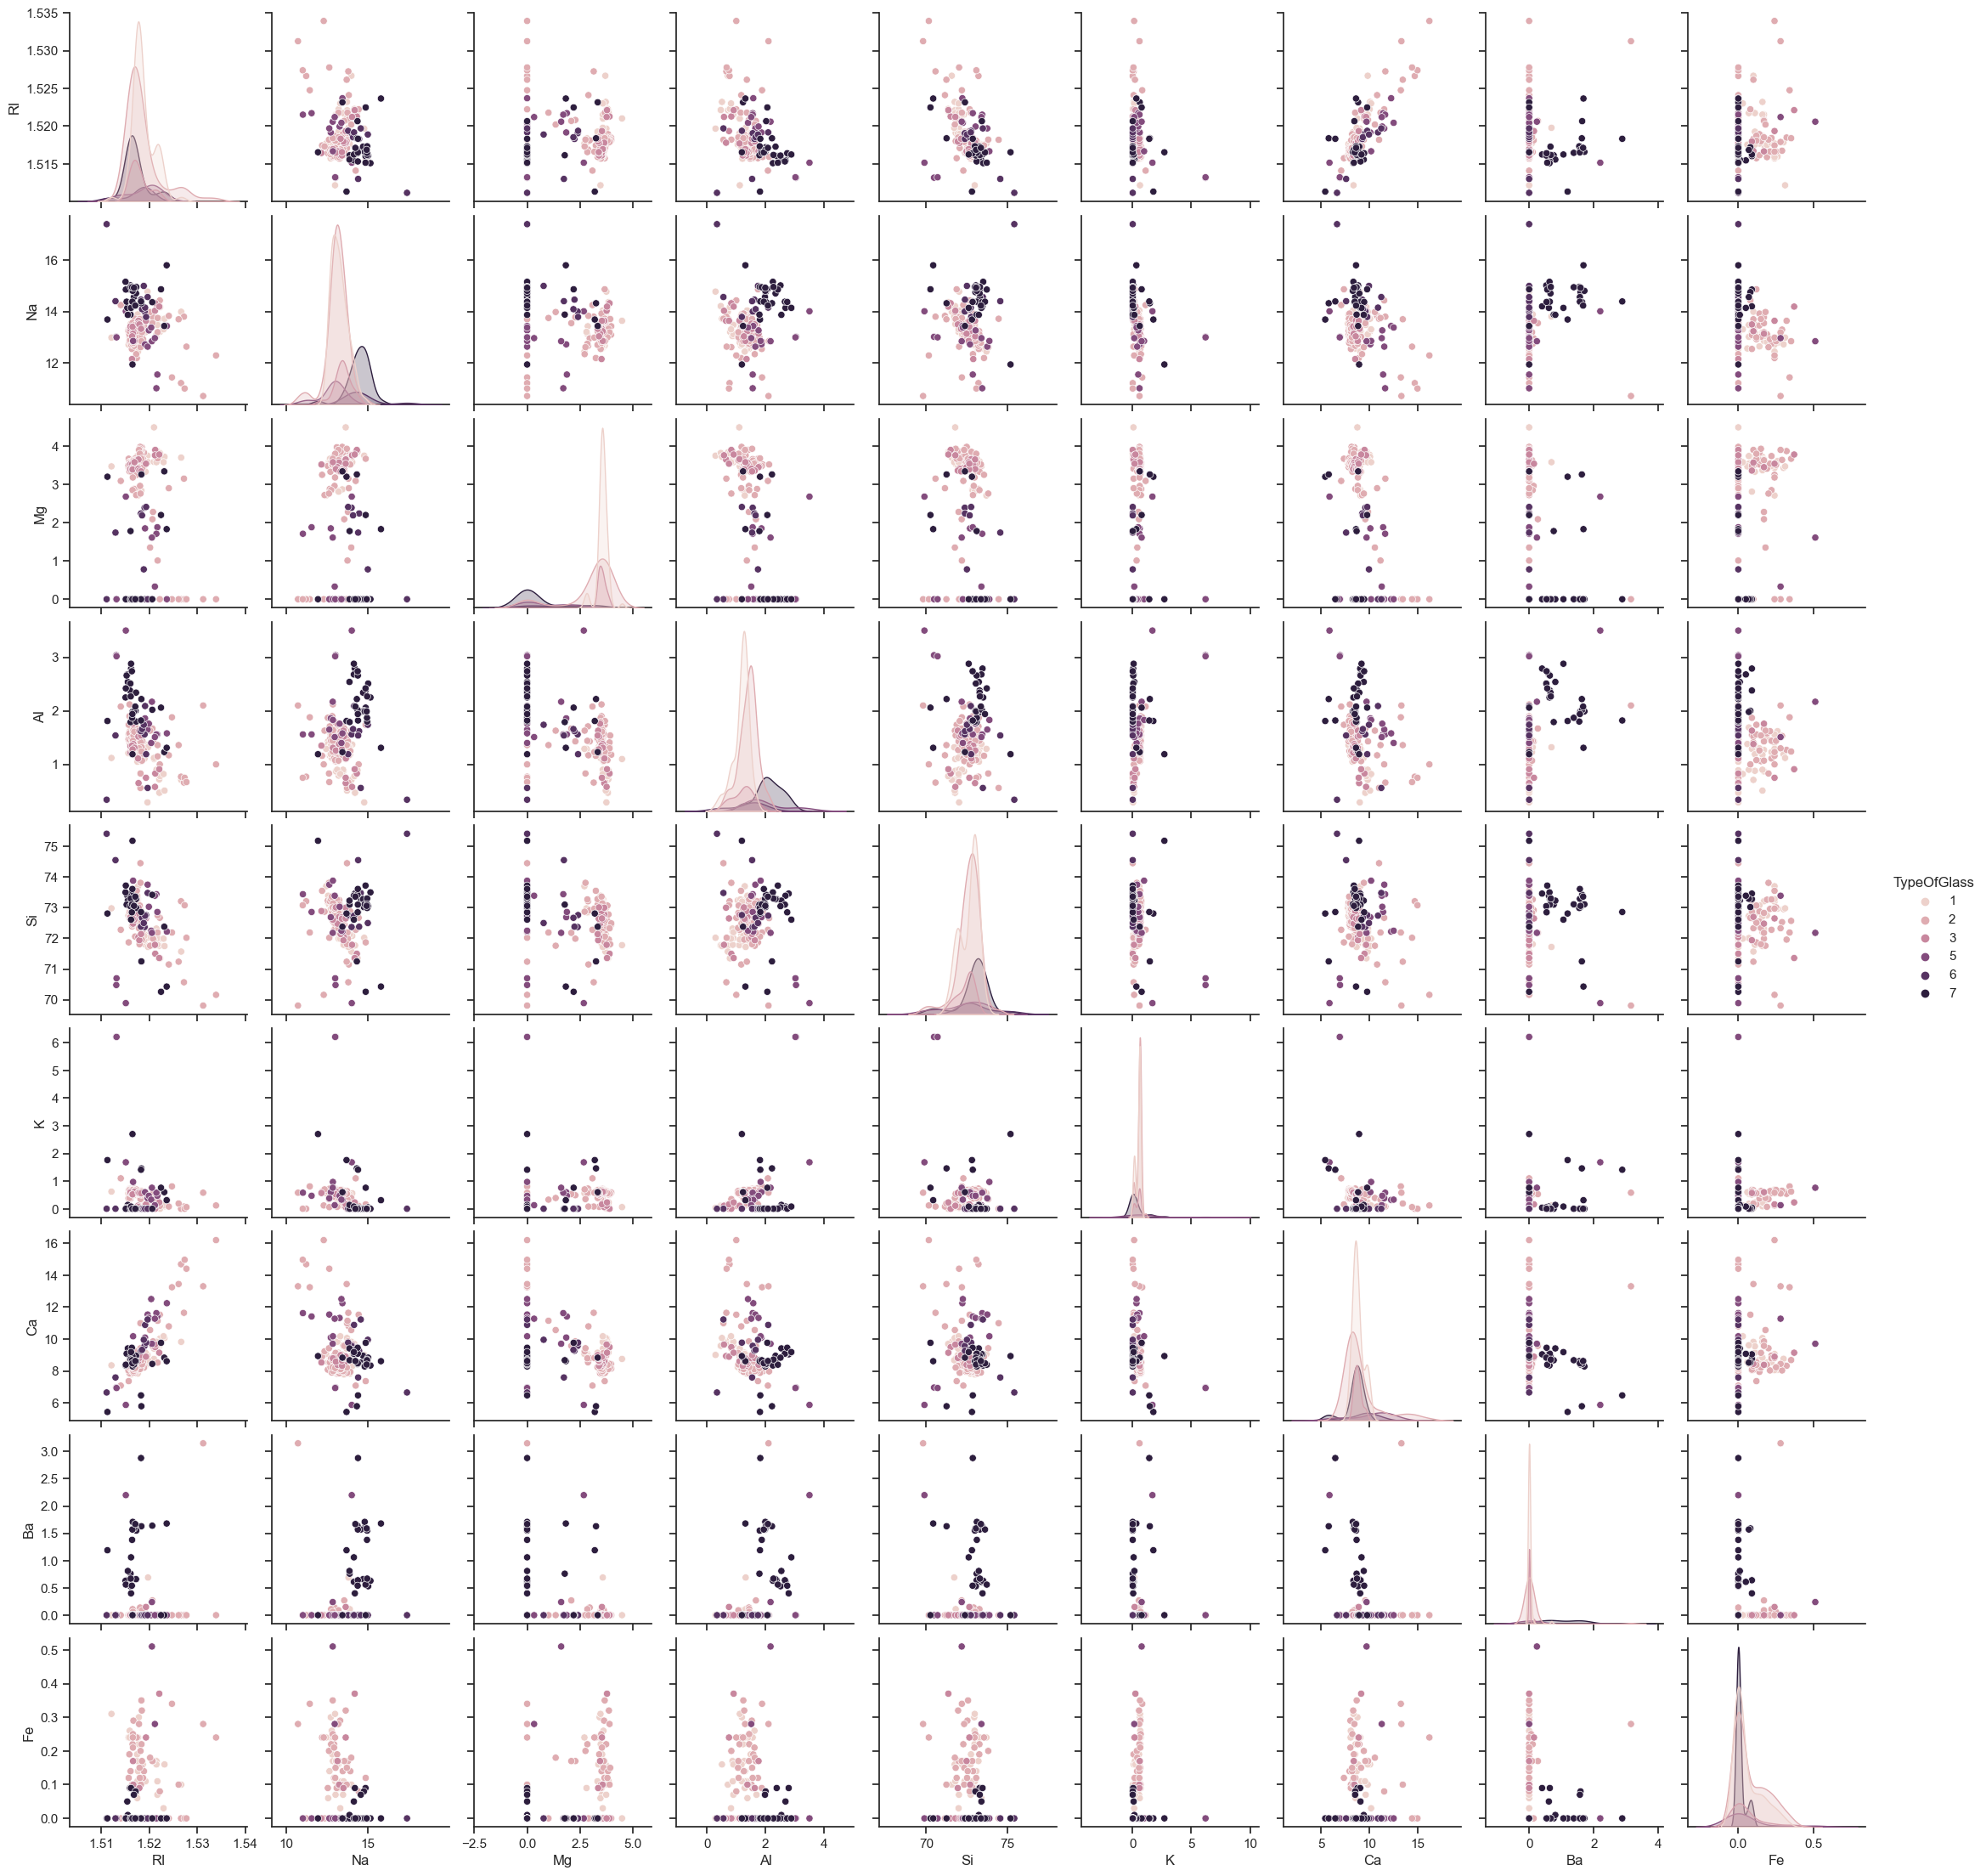

In [24]:
sns_df = df
#df.iloc[:, 1:]
#sns.set(style="ticks")
sns.pairplot(sns_df, hue="TypeOfGlass");

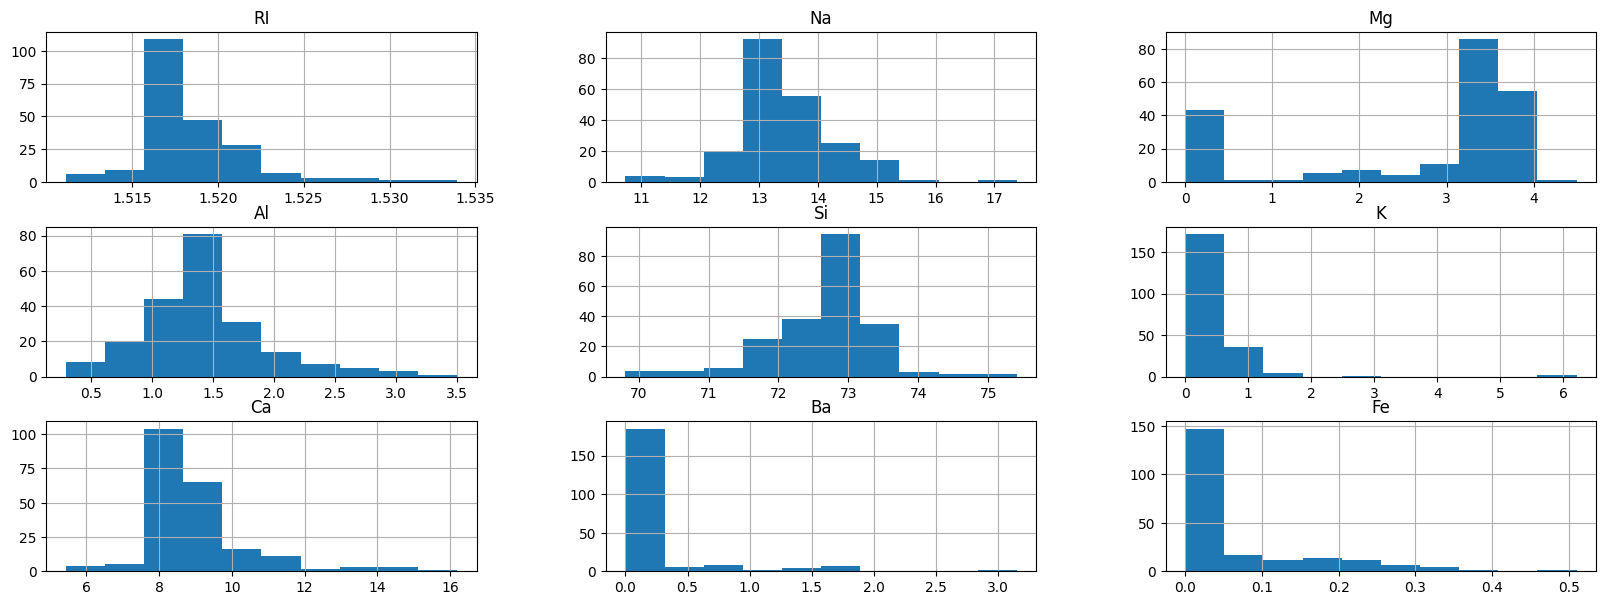

In [11]:
df_features.hist(layout=(20,3), figsize=(20,50));

<Axes: >

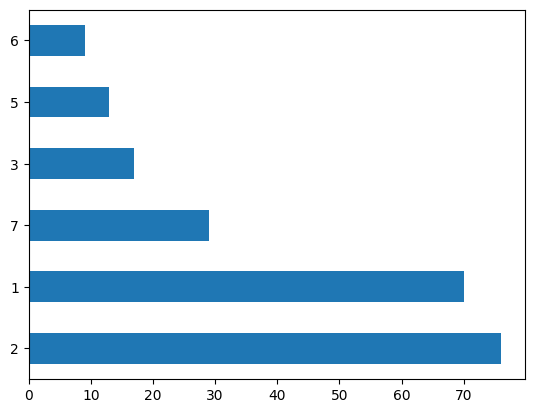

In [13]:
df['TypeOfGlass'].value_counts().plot(kind='barh')

In [255]:
print(df['TypeOfGlass'].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: TypeOfGlass, dtype: int64


# Building models

In [225]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, ShuffleSplit, StratifiedKFold, GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [221]:
# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [28]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [235]:
#print(y)

## Simple models

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5581395348837209


### Stratify vs Shuffle split

In [53]:
for i in range(5):
    
    classifier = GaussianNB()
    #shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=5)
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)

    scores = cross_val_score(classifier, X, y, cv=stratified_kfold)  # 'cv' specifies the number of folds for cross-validation

    # Displaying the cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.20930233 0.60465116 0.44186047 0.53488372 0.5       ]
Mean Accuracy: 0.45813953488372094
Cross-Validation Scores: [0.46511628 0.27906977 0.44186047 0.39534884 0.54761905]
Mean Accuracy: 0.4258028792912514
Cross-Validation Scores: [0.51162791 0.51162791 0.48837209 0.30232558 0.47619048]
Mean Accuracy: 0.45802879291251386
Cross-Validation Scores: [0.3255814  0.53488372 0.60465116 0.27906977 0.5       ]
Mean Accuracy: 0.44883720930232557
Cross-Validation Scores: [0.46511628 0.44186047 0.41860465 0.48837209 0.26190476]
Mean Accuracy: 0.415171650055371


In [54]:
for i in range(5):
    
    classifier = GaussianNB()
    shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=5)

    scores = cross_val_score(classifier, X, y, cv=shuffle_split)  # 'cv' specifies the number of folds for cross-validation

    # Displaying the cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.4        0.47692308 0.55384615 0.32307692 0.46153846]
Mean Accuracy: 0.4430769230769231
Cross-Validation Scores: [0.52307692 0.26153846 0.49230769 0.35384615 0.4       ]
Mean Accuracy: 0.4061538461538462
Cross-Validation Scores: [0.47692308 0.58461538 0.43076923 0.56923077 0.49230769]
Mean Accuracy: 0.5107692307692308
Cross-Validation Scores: [0.56923077 0.52307692 0.33846154 0.44615385 0.49230769]
Mean Accuracy: 0.4738461538461539
Cross-Validation Scores: [0.47692308 0.49230769 0.43076923 0.53846154 0.52307692]
Mean Accuracy: 0.49230769230769234


In [56]:
for i in range(5):
    
    classifier = RandomForestClassifier()
    shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=5)

    scores = cross_val_score(classifier, X, y, cv=shuffle_split)  # 'cv' specifies the number of folds for cross-validation

    # Displaying the cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.84615385 0.76923077 0.76923077 0.86153846 0.76923077]
Mean Accuracy: 0.803076923076923
Cross-Validation Scores: [0.78461538 0.73846154 0.61538462 0.78461538 0.83076923]
Mean Accuracy: 0.7507692307692307
Cross-Validation Scores: [0.76923077 0.75384615 0.72307692 0.67692308 0.8       ]
Mean Accuracy: 0.7446153846153847
Cross-Validation Scores: [0.75384615 0.83076923 0.78461538 0.70769231 0.76923077]
Mean Accuracy: 0.7692307692307693
Cross-Validation Scores: [0.8        0.72307692 0.81538462 0.69230769 0.83076923]
Mean Accuracy: 0.7723076923076924


In [61]:
for i in range(5):
    
    classifier = DecisionTreeClassifier()
    shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=5)

    scores = cross_val_score(classifier, X, y, cv=shuffle_split)  # 'cv' specifies the number of folds for cross-validation

    # Displaying the cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.69230769 0.67692308 0.6        0.67692308 0.67692308]
Mean Accuracy: 0.6646153846153847
Cross-Validation Scores: [0.66153846 0.69230769 0.69230769 0.72307692 0.72307692]
Mean Accuracy: 0.6984615384615385
Cross-Validation Scores: [0.64615385 0.67692308 0.75384615 0.66153846 0.64615385]
Mean Accuracy: 0.676923076923077
Cross-Validation Scores: [0.67692308 0.73846154 0.69230769 0.75384615 0.66153846]
Mean Accuracy: 0.7046153846153846
Cross-Validation Scores: [0.67692308 0.64615385 0.72307692 0.63076923 0.72307692]
Mean Accuracy: 0.68


In [278]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# PCA

In [290]:
from sklearn.decomposition import PCA

scaler=StandardScaler()

df_features_scaled = scaler.fit_transform(df_features)

pca_model = PCA()

pca_model.fit_transform(df_features_scaled)

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

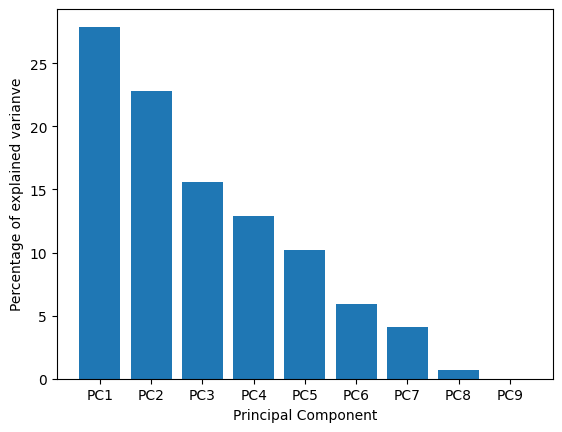

In [291]:
per_var = np.round(pca_model.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+ str(i) for i in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained varianve')
plt.xlabel('Principal Component')
plt.show()

# Pipeline

In [292]:
def flexible_pipeline(X, model, scaler=StandardScaler(), encoder=OneHotEncoder(), num_imputer=KNNImputer(), pca=False):
    
    numerical = X.select_dtypes(exclude=["category","object"]).columns.tolist()
    categorical = X.select_dtypes(["category","object"]).columns.tolist()
    
    numerical_transformer = Pipeline(steps=[('imputer', num_imputer)])
    
    if scaler is not None:
        numerical_transformer.steps.insert(1,["scaler", scaler])

        
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])
    
    if encoder is not None:
        categorical_transformer.steps.insert(1,["encoder", encoder])
     
    preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical),
                                                   ('num', numerical_transformer, numerical)])
    
    if pca==True:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),('pca', PCA(n_components=6)),('model', model)])
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])    
    
    return pipeline

In [16]:
X = df_features
y = df.iloc[:, -1]

In [25]:
first_pipe= flexible_pipeline(X, DecisionTreeClassifier(random_state=0))
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(first_pipe, X, y, cv=stratified_kfold)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.79069767 0.69767442 0.6744186  0.69767442 0.73809524]
Mean Accuracy: 0.7197120708748616


In [50]:
first_pipe= flexible_pipeline(X, LogisticRegression(max_iter=10000), scaler=None)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(first_pipe, X, y, cv=stratified_kfold)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.6744186  0.65116279 0.58139535 0.58139535 0.5952381 ]
Mean Accuracy: 0.6167220376522703


In [26]:
def heatmap(columns, rows, scores):
    plt.figure() 
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")

None


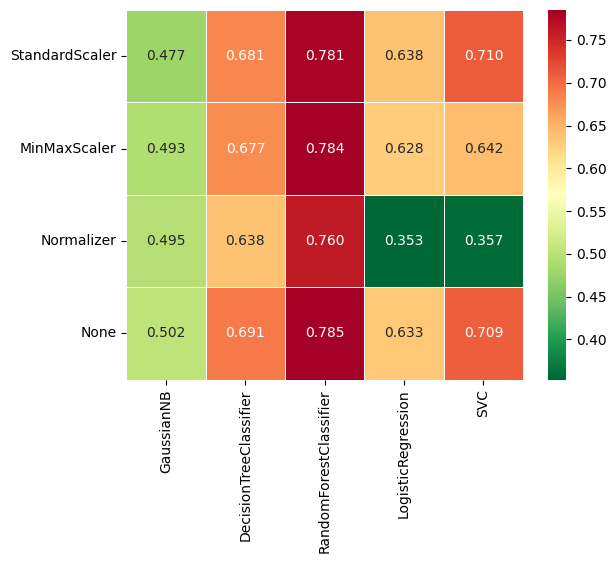

In [234]:
#from category_encoders import TargetEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline

def plot_2_2(X, y):
        
    scalers=[StandardScaler(), MinMaxScaler(), Normalizer(), None]
    model=[GaussianNB(var_smoothing=0.01), DecisionTreeClassifier(), 
           RandomForestClassifier(n_estimators=100), LogisticRegression(max_iter=10000,C=10), 
           SVC(C=1000, gamma=0.01, kernel='rbf')]
    
    #numpy array filled with zeros
    scores = np.zeros((4, 5))
    
    stratified_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=0)
    #shuffle_split = ShuffleSplit(n_splits=5, random_state=0)
    
    #filling an array with scores
    for m in model:
        for s in scalers:
            pipe = flexible_pipeline(X, m, scaler=s)
            results = cross_val_score(pipe, X, y,cv=stratified_kfold, scoring = 'accuracy', n_jobs=1)
            scores[scalers.index(s)][model.index(m)]=np.mean(results)
            
    #names        
    rows=['StandardScaler', 'MinMaxScaler','Normalizer','None']
    columns=['GaussianNB', 'DecisionTreeClassifier','RandomForestClassifier', 'LogisticRegression','SVC']
    print(heatmap(columns, rows, scores)) 
plot_2_2(X, y)    

# Repeated simulations with PCA

None


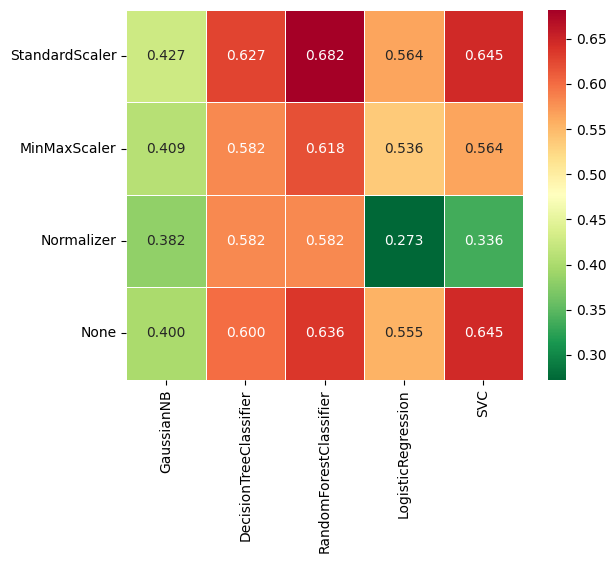

In [293]:
def plot_2_3(X, y):
        
    scalers=[StandardScaler(), MinMaxScaler(), Normalizer(), None]
    model=[GaussianNB(var_smoothing=0.01), DecisionTreeClassifier(), 
           RandomForestClassifier(n_estimators=100), LogisticRegression(max_iter=10000,C=10), 
           SVC(C=1000, gamma=0.01, kernel='rbf')]
    
    #numpy array filled with zeros
    scores = np.zeros((4, 5))
    
    #stratified_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=0)
    shuffle_split = ShuffleSplit(n_splits=5, random_state=0)
    
    #filling an array with scores
    for m in model:
        for s in scalers:
            pipe = flexible_pipeline(X, m, scaler=s, pca=True)
            results = cross_val_score(pipe, X, y,cv=shuffle_split, scoring = 'accuracy', n_jobs=1)
            scores[scalers.index(s)][model.index(m)]=np.mean(results)
            
    #names        
    rows=['StandardScaler', 'MinMaxScaler','Normalizer','None']
    columns=['GaussianNB', 'DecisionTreeClassifier','RandomForestClassifier', 'LogisticRegression','SVC']
    print(heatmap(columns, rows, scores)) 
plot_2_3(X, y)    

# Comparison of the best models

In [ ]:
def mean_scores(report):
    report_lines = report.split('\n')
    precision_values, recall_values, f1_score_values = [],[],[]
    for line in report_lines[2:-5]: 
        precision = float(line.split()[1])
        recall = float(line.split()[2])
        f1_score = float(line.split()[3])
        precision_values.append(precision)
        recall_values.append(recall)
        f1_score_values.append(f1_score)
    mean_precision = sum(precision_values) / len(precision_values)
    mean_recall = sum(recall_values) / len(recall_values)
    mean_f1_score = sum(f1_score_values) / len(f1_score_values)
    return mean_precision, mean_recall, mean_f1_score

## Random Forest

In [294]:
random_forest_pipe = flexible_pipeline(X, RandomForestClassifier(n_estimators=100), scaler=MinMaxScaler())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_pipe.fit(X_train, y_train)
y_pred = random_forest_pipe.predict(X_test)

In [295]:
rf_report=classification_report(y_test, y_pred)
print(rf_report)

              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.79      0.79      0.79        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.85      0.84      0.83        43



In [253]:
print(mean_scores(rf_report))

(0.9333333333333332, 0.855, 0.8783333333333333)


## Naive Bayes

In [296]:
naive_bayes_pipe = flexible_pipeline(X, GaussianNB(var_smoothing=0.01), scaler=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_pipe.fit(X_train, y_train)
y_pred = random_forest_pipe.predict(X_test)
gb_report=classification_report(y_test, y_pred)
print(gb_report)

              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.79      0.79      0.79        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.85      0.84      0.83        43



In [297]:
print(mean_scores(gb_report))

(0.9083333333333333, 0.8116666666666666, 0.8383333333333333)


## Decision Tree

In [300]:
decision_tree_pipe = flexible_pipeline(X, DecisionTreeClassifier(), scaler=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_pipe.fit(X_train, y_train)
y_pred = decision_tree_pipe.predict(X_test)
dt_report=classification_report(y_test, y_pred)
print(dt_report)
print(mean_scores(dt_report))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.88      0.50      0.64        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.73      1.00      0.84         8

    accuracy                           0.79        43
   macro avg       0.84      0.86      0.83        43
weighted avg       0.82      0.79      0.78        43

(0.8450000000000001, 0.86, 0.8333333333333334)


## Logistic Regression

In [301]:
log_reg_pipe = flexible_pipeline(X, LogisticRegression(max_iter=10000,C=10), scaler=StandardScaler())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_test)
lr_report=classification_report(y_test, y_pred)
print(lr_report)
print(mean_scores(lr_report))

              precision    recall  f1-score   support

           1       0.57      0.73      0.64        11
           2       0.60      0.64      0.62        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.88      0.88      0.88         8

    accuracy                           0.67        43
   macro avg       0.67      0.62      0.63        43
weighted avg       0.67      0.67      0.66        43

(0.6749999999999999, 0.625, 0.635)


## SVC

In [302]:
svc_pipe = flexible_pipeline(X, SVC(C=1000, gamma=0.01, kernel='rbf'), scaler=StandardScaler())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_pipe.fit(X_train, y_train)
y_pred = svc_pipe.predict(X_test)
svc_report=classification_report(y_test, y_pred)
print(svc_report)
print(mean_scores(svc_report))

              precision    recall  f1-score   support

           1       0.56      0.91      0.69        11
           2       0.78      0.50      0.61        14
           3       0.67      0.67      0.67         3
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.72        43
   macro avg       0.78      0.73      0.74        43
weighted avg       0.77      0.72      0.72        43

(0.7799999999999999, 0.73, 0.7383333333333333)


# Missing values

In [270]:
X_nan = X.copy()
missing_count = int(0.05 * df.shape[0])

np.random.seed(42) 

for column in X_nan.columns:
   indices = np.random.choice(df.index, size=missing_count, replace=False)
   X_nan.loc[indices, column] = np.nan

print(indices) 

[ 47   9 189  66  65  15 143  37 117 150]


In [271]:
X_nan[:14]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,NaN,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
6,1.51743,13.30,3.60,NaN,73.09,0.58,8.17,0.0,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,NaN,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00
9,NaN,13.00,3.60,1.36,72.99,0.57,8.40,0.0,NaN


In [276]:
rf_miss_val_pipe = flexible_pipeline(X_nan, RandomForestClassifier(n_estimators=100), scaler=MinMaxScaler())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

rf_miss_val_pipe.fit(X_train, y_train)
y_pred = rf_miss_val_pipe.predict(X_test)

In [277]:
rfmv_report=classification_report(y_test, y_pred)
print(rfmv_report)

              precision    recall  f1-score   support

           1       0.67      0.75      0.71        16
           2       0.62      0.67      0.65        15
           3       1.00      0.25      0.40         4
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.70        43
   macro avg       0.83      0.74      0.74        43
weighted avg       0.73      0.70      0.69        43



# Chosing best model hyperparameters

## Gaussian Naive Bayes

In [170]:
classifier = GaussianNB()
skfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
params_class = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=classifier, 
                     param_grid=params_class,
                     cv=skfold,
                     verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X, y);

Fitting 4 folds for each of 100 candidates, totalling 400 fits


In [171]:
print(f'GaussianNB best parameter: {gs_NB.best_params_}')
print(f'Accuracy achieved with this parameter: {gs_NB.best_score_}')

GaussianNB best parameter: {'var_smoothing': 0.01}
Accuracy achieved with this parameter: 0.5183438155136268


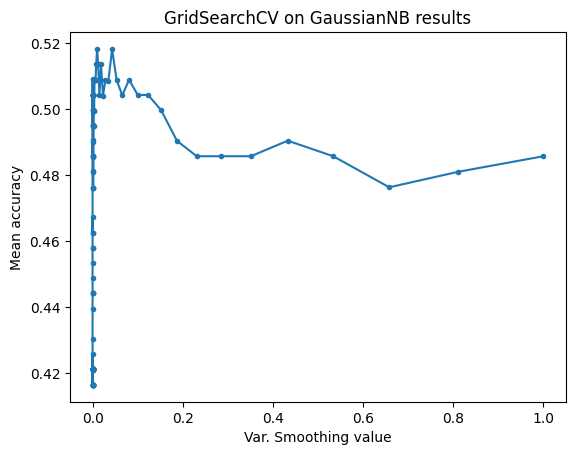

In [172]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing value')
plt.ylabel("Mean accuracy")
plt.title("GridSearchCV on GaussianNB results")
plt.show()

## Decision Tree Classifier

None


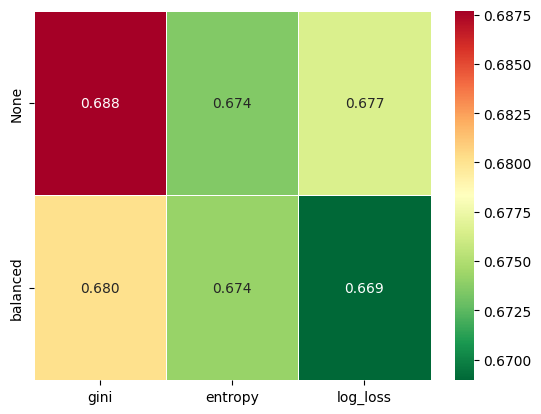

In [187]:
def plot_df_params(X, y):
    
    criterions=["gini", "entropy", "log_loss"]
    weights = [None, "balanced"]

    #numpy array filled with zeros
    scores = np.zeros((2, 3))
    
    stratified_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=0)
    
    #filling an array with scores
    for c in criterions:
        for w in weights:
            classifier=DecisionTreeClassifier(criterion=c,class_weight=w)
            results = cross_val_score(classifier, X, y,cv=stratified_kfold, scoring = 'accuracy', n_jobs=1)
            scores[weights.index(w)][criterions.index(c)]=np.mean(results)
            
    #names        
    rows=["None", "balanced"]
    columns=criterions
    print(heatmap(columns, rows, scores))       
plot_df_params(X, y)    

## Random Forest Classifier

In [201]:
classifier = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
params_class = {'n_estimators': [(i+1)*50 for i in range(10)]}

gs_RF = GridSearchCV(estimator=classifier, 
                     param_grid=params_class,
                     cv=skfold,
                     verbose=1, 
                     scoring='accuracy')
gs_RF.fit(X, y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [202]:
print(f'RandomForestClassifier best parameter: {gs_RF.best_params_}')
print(f'Accuracy achieved with this parameter: {gs_RF.best_score_}')

RandomForestClassifier best parameter: {'n_estimators': 100}
Accuracy achieved with this parameter: 0.8224143955276031


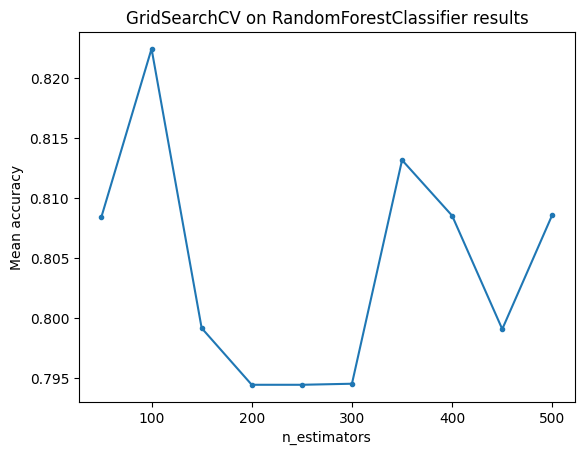

In [203]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
plt.plot(results_RF['n_estimators'], results_RF['test_score'], marker = '.')    
plt.xlabel('n_estimators')
plt.ylabel("Mean accuracy")
plt.title("GridSearchCV on RandomForestClassifier results")

plt.show()

## Logistic regression

In [217]:
X_scaled = StandardScaler().fit_transform(X)
classifier = LogisticRegression(max_iter=10000)
stratified_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=0)
param_c = {'C': [np.logspace(-8,3, num=12)][0]}
gs_LR = GridSearchCV(estimator=classifier, 
                     param_grid=param_c,
                     cv=stratified_kfold,
                     verbose=1, 
                     scoring='accuracy')
gs_LR.fit(X_scaled, y)

Fitting 50 folds for each of 12 candidates, totalling 600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy', verbose=1)

In [218]:
print(f'LogisticRegression best parameter: {gs_LR.best_params_}')
print(f'Accuracy achieved with this parameter: {gs_LR.best_score_}')

LogisticRegression best parameter: {'C': 10.0}
Accuracy achieved with this parameter: 0.6387043189368771


In [229]:
grid_predictions_LR = gs_LR.predict(X_scaled)
print(classification_report(y, grid_predictions_LR))

              precision    recall  f1-score   support

           1       0.64      0.71      0.68        70
           2       0.66      0.74      0.70        76
           3       0.00      0.00      0.00        17
           5       0.90      0.69      0.78        13
           6       0.90      1.00      0.95         9
           7       0.97      0.97      0.97        29

    accuracy                           0.71       214
   macro avg       0.68      0.68      0.68       214
weighted avg       0.67      0.71      0.69       214



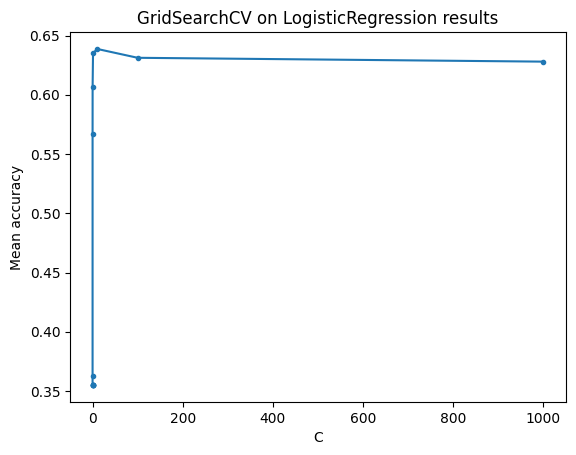

In [227]:
results_LR = pd.DataFrame(gs_LR.cv_results_['params'])
results_LR['test_score'] = gs_LR.cv_results_['mean_test_score']
plt.plot(results_LR['C'], results_LR['test_score'], marker = '.')    
plt.xlabel('C')
plt.ylabel("Mean accuracy")
plt.title("GridSearchCV on LogisticRegression results")

plt.show()

## SVC

In [223]:
X_scaled = StandardScaler().fit_transform(X)
classifier = SVC()
stratified_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=0)
param_svc = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf','poly']
}
gs_SVC = GridSearchCV(estimator=classifier, 
                     param_grid=param_svc,
                     cv=stratified_kfold,
                     verbose=1, 
                     scoring='accuracy')
gs_SVC.fit(X_scaled, y)

Fitting 50 folds for each of 75 candidates, totalling 3750 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [224]:
print(f'SVC best parameters: {gs_SVC.best_params_}')
print(f'Accuracy achieved with this parameter: {gs_SVC.best_score_}')

SVC best parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy achieved with this parameter: 0.7059689922480621


In [226]:
grid_predictions = gs_SVC.predict(X_scaled)
print(classification_report(y, grid_predictions))

              precision    recall  f1-score   support

           1       0.77      0.91      0.84        70
           2       0.92      0.78      0.84        76
           3       0.81      0.76      0.79        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        29

    accuracy                           0.87       214
   macro avg       0.92      0.91      0.91       214
weighted avg       0.88      0.87      0.87       214

